In [16]:
pip install plotly pandas numpy scipy

Note: you may need to restart the kernel to use updated packages.


# Balanced Risk Set Matching (Li et al., 2001)

This is a study of treatment, cystoscopy, and hydrodistention, given in response to the symptoms of the chronic, nonlethal disease interstitial cystitis. The idea of the journal is to match the treatment of the patient with a similar history of symptoms who have different times receiving their treatment. It is described as time $t$ for when the patient received their treatment.

## Data

The journal uses the Interstitial Cystitis Data Base (ICDB) for the data, but we will be using synthetic data simulating a similar result. The data currently being used is not trained to accurately reproduce a similar result to ICDB.

In [17]:
from defs import patients_entry

patients_entry.set_index("id").head(10)

,gender,pain,urgency,nocturnal frequency
id,,,,
0,M,3,3,4
1,F,8,7,2
2,F,0,4,3
3,F,4,2,3
4,M,8,5,2
5,F,6,8,2
6,M,2,8,4
7,F,7,4,3
8,M,3,5,1


Patients are evaluated at intervals of approximately every 3 months thereafter for up to 4 years. Three quantities are measured repeatedly over time:

- Pain
- Urgency
- Nocturnal Frequency

Pain and urgency are subjective appraisals on a scale from 0 - 9.

In [18]:
from defs import patients_evaluations

patients_evaluations.groupby("id")[
    ["pain", "urgency", "nocturnal frequency"]
].mean().head(10)

,pain,urgency,nocturnal frequency
id,,,
0,4.0625,5.2500,2.6875
1,4.8750,4.5625,3.1250
2,3.3750,5.8125,2.4375
3,4.6250,5.0000,1.8125
4,2.7500,4.8750,2.1250
5,4.2500,4.5625,2.8750
6,3.9375,5.8125,2.7500
7,4.6250,5.3125,3.0000
8,4.6250,5.8125,2.9375


If patient $m$ received the treatent at time $T_m$, then compare the response of this patient to a patient who did not receive the treatment up to time $T_m$.

In [19]:
from defs import patients_risk_set

patients_risk_set.head(10)

,12,33,6,21,24,39,15,42,9,27,18,0,3,45,36,30
0,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...
1,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...,id gender pain urgency nocturnal freq...


$\alpha_p \in \mathcal{T}$ are $K$ binary variables $B_{pk} = 1$ or $B_{pk} = 0$ for $k = 1, \dots, K$. Each potential pairing $(\alpha_p, \alpha_q) = e \in \mathcal{E}$, there are $K$ binary variables, $B_{ek} = 1$ or $B_{ek} = 0$ for $k = 1, \dots, K$.

$
\begin{align}
\sum_{(\alpha_p, \alpha_q) \in M} B_{pk} &= \sum_{e \in M} B_{ek} & \text{for}\ k = 1, \dots, K \\
\end{align}
$

The first sum describes treated patients, and the second sum describes their matched controls at times determined by attributes of the treated subject.

These variables are discrete, so the thirds are not exactly 33%; however, they are exactly matched. For instance, for pain at baseline, 37% of the 100 matched treated patients had pain scores of 3 or lower, and 37% of the 100 matched controls had pain scores of 3 or lower. Similarly, in both groups, 44% had baseline pain scores strictly above 3 and no more than 6, and in both groups, 19% had baseline pain scores stricly above 6.

In [20]:
from defs import patients_rs_binary_variables

patients_rs_binary_variables.head()

,12,33,6,21,24,39,15,42,9,27,18,0,3,45,36,30
0,id gender pain current urgency current ...,id gender pain current urgency current ...,id gender pain current urgency current ...,id gender pain current urgency current ...,id gender pain current urgency current ...,id gender pain current urgency current ...,id gender pain current urgency current ...,id gender pain current urgency current ...,id gender pain current urgency current ...,id gender pain current urgency current ...,id gender pain current urgency current ...,id gender pain current urgency current ...,id gender pain current urgency current ...,id gender pain current urgency current ...,id gender pain current urgency current ...,id gender pain current urgency current ...
1,id gender pain current urgency current...,id gender pain current urgency current...,id gender pain current urgency current...,id gender pain current urgency current...,id gender pain current urgency current...,id gender pain current urgency current...,id gender pain current urgency current...,id gender pain current urgency current...,id gender pain current urgency current...,id gender pain current urgency current...,id gender pain current urgency current...,id gender pain current urgency current...,id gender pain current urgency current...,id gender pain current urgency current...,id gender pain current urgency current...,id gender pain current urgency current...


## Matching by Minimum Cost Flow in a Network

Set $\mathcal{A} = \{ \alpha_1, \dots, \alpha_M \}$ called units. Set $\mathcal{T} \subseteq \mathcal{A}$ called treated units. Set $\mathcal{E} \subseteq \mathcal{T} \times \mathcal{A}$ called edges. If the pair $e = ( \alpha_p, \alpha_q )$ is an edge $e \in \mathcal{E}$, then it is permitted to match $\alpha_p$ to $\alpha_q$, but if $e \not\in \mathcal{E}$, then this match is forbidden.

The journal $\mathcal{A}$ consists of 400 patients randomly sampled from the IC database.

For each $e \in \mathcal{E}$, there is a distance $\delta_e > 0$. The distance $\delta_e$ is the Mahalanobis distance between subject $\alpha_p$ and control $\alpha_q$ on a six-dimensional covariate describing the three symptoms at baseline and at time $T_p$ when $a_q$ received treatment.

In [21]:
from collections import defaultdict

import pandas as pd
from scipy.spatial import distance

from defs import patients_rs_binary_variables

variables = [
    "pain current",
    "urgency current",
    "nocturnal frequency current",
    "pain baseline",
    "urgency baseline",
    "nocturnal frequency baseline",
]

distances = defaultdict(list)


def mahalanobis_distance(t: pd.DataFrame, c: pd.DataFrame, cov: list[str]):
    t_m = t[cov].to_numpy()
    c_m = c[cov].to_numpy()

    return distance.cdist(t_m, c_m, "mahalanobis")


for _, (t, c) in patients_rs_binary_variables.items():
    dist_m = mahalanobis_distance(t, c, variables)

    for i, row in enumerate(dist_m):
        for j, dist in enumerate(row):
            distances[dist].append(((t["id"].iloc[i]), (c["id"].iloc[j])))

avg_distances = sum(distances.keys()) / len(distances.keys())

avg_distances

np.float64(3.3379749290420784)

Set $S \subseteq M \subseteq \mathcal{E}$ where $|M| = S$ edges such that each unit $\alpha_q \in \mathcal{A}$ appears in at most one matched pair, possibly as $(\alpha_p, \alpha_q) \in M$ or as $(\alpha_q, \alpha_p) \in M$ but not as both. $\sum_{e \in M} \delta_e$ over all pair matchings $M$ of size $S$ obtainable with the given structure $\mathcal{A}, \mathcal{T}, \mathcal{E}$.

$|M| = S = 100$ matched pairs. There are three variables: pain score, urgency score, and nocturnal frequency. A patient is paired to their matched not-yet-treated data.

In [22]:
import pandas as pd

M = 100

min_cost_flow_matches = []

for k in sorted(distances.keys()):
    for match in distances[k]:
        if len(min_cost_flow_matches) >= M:
            break

        min_cost_flow_matches.append(match)

pd.DataFrame(
    min_cost_flow_matches, columns=["id treated", "id controlled"]
).head(10)

,id treated,id controlled
0,73,103
1,67,248
2,156,293
3,168,110
4,84,328
5,258,92
6,397,116
7,168,174
8,276,294
9,148,12


## Balanced Pair Matching

Discused in section [Data](#data) on the variable `patients_rs_binary_variables`

In [23]:
import pandas as pd

from defs import patients_rs_binary_variables

balanced_pair_matches = []
patients = set()

variables = [
    "pain current",
    "urgency current",
    "nocturnal frequency current",
    "pain baseline",
    "urgency baseline",
    "nocturnal frequency baseline",
]

variables = [f"{v} middle" for v in variables] + [
    f"{v} upper" for v in variables
]


def find_group(data: pd.DataFrame, variables: list[str]):
    group = 0

    for i, v in enumerate(variables):
        group += (i + 1) * data.loc[v]

    return group


for _, (t, c) in patients_rs_binary_variables.items():
    for i in range(t.shape[0]):
        for j in range(c.shape[0]):
            if len(balanced_pair_matches) < M and find_group(
                t.iloc[i], variables
            ) == find_group(c.iloc[j], variables):
                t_id = t["id"].iloc[i]
                c_id = c["id"].iloc[j]

                if t_id not in patients and c_id not in patients:
                    balanced_pair_matches.append((t_id, c_id))
                    patients.add(t_id)
                    patients.add(c_id)

len(balanced_pair_matches)

100

## Graphical Comparisons

Finally, all of the preparations are done; all that is left is to plot our results on a boxplot. To do this, we will be grouping each result as such:

- Baseline Treated & Controlled (i.e., Never/Later Treated)
- At Treatment Treated & Controlled
- 3 months after treatment Treated & Controlled
- 6 months after treatment Treated & Controlled

We will also plot the difference of 3 and 6 months after treatment; in total, we will have 6 boxplots that will be displayed for each variable (i.e., pain, urgency, nocturnal frequency).


In [24]:
import pandas as pd

from defs import patients_entry, patients_evaluations

data_collections = {
    "Baseline": (pd.DataFrame(), pd.DataFrame()),
    "At Treatment": (pd.DataFrame(), pd.DataFrame()),
    "3 Months After Treatment": (pd.DataFrame(), pd.DataFrame()),
    "6 Months After Treatment": (pd.DataFrame(), pd.DataFrame()),
    "Difference (3 mos posttreatment)": (pd.DataFrame(), pd.DataFrame()),
    "Difference (6 mos posttreatment)": (pd.DataFrame(), pd.DataFrame()),
}

variables = ["pain", "urgency", "nocturnal frequency"]

for p_t, p_c in balanced_pair_matches:
    treatment_time = patients_evaluations[
        (patients_evaluations["id"] == p_t)
        & (
            patients_evaluations["treatment time"]
            == patients_evaluations["time"]
        )
    ][variables + ["treatment time"]]

    if treatment_time["treatment time"].empty:
        continue

    time = treatment_time["treatment time"].iloc[0]

    treatment_time.drop("treatment time", axis=1, inplace=True)

    data_collections["Baseline"] = (
        pd.concat(
            [
                data_collections["Baseline"][0],
                patients_entry[patients_entry["id"] == p_t],
            ]
        ),
        pd.concat(
            [
                data_collections["Baseline"][1],
                patients_entry[patients_entry["id"] == p_c],
            ]
        ),
    )

    data_collections["At Treatment"] = (
        pd.concat(
            [
                data_collections["At Treatment"][0],
                treatment_time,
            ]
        ),
        pd.concat(
            [
                data_collections["At Treatment"][1],
                patients_evaluations[
                    (patients_evaluations["id"] == p_c)
                    & (patients_evaluations["time"] == time)
                ][variables],
            ]
        ),
    )

    data_collections["3 Months After Treatment"] = (
        pd.concat(
            [
                data_collections["3 Months After Treatment"][0],
                patients_evaluations[
                    (patients_evaluations["id"] == p_t)
                    & (patients_evaluations["time"] == time + 3)
                ][variables],
            ]
        ),
        pd.concat(
            [
                data_collections["3 Months After Treatment"][1],
                patients_evaluations[
                    (patients_evaluations["id"] == p_c)
                    & (patients_evaluations["time"] == time + 3)
                ][variables],
            ]
        ),
    )

    data_collections["6 Months After Treatment"] = (
        pd.concat(
            [
                data_collections["6 Months After Treatment"][0],
                patients_evaluations[
                    (patients_evaluations["id"] == p_t)
                    & (patients_evaluations["time"] == time + 6)
                ][variables],
            ]
        ),
        pd.concat(
            [
                data_collections["6 Months After Treatment"][1],
                patients_evaluations[
                    (patients_evaluations["id"] == p_c)
                    & (patients_evaluations["time"] == time + 6)
                ][variables],
            ]
        ),
    )

    data_collections["Difference (3 mos posttreatment)"] = (
        pd.concat(
            [
                data_collections["Difference (3 mos posttreatment)"][0],
                data_collections["3 Months After Treatment"][0]
                - data_collections["At Treatment"][0],
            ]
        ),
        pd.concat(
            [
                data_collections["Difference (3 mos posttreatment)"][1],
                data_collections["3 Months After Treatment"][1]
                - data_collections["At Treatment"][1],
            ]
        ),
    )

    data_collections["Difference (6 mos posttreatment)"] = (
        pd.concat(
            [
                data_collections["Difference (6 mos posttreatment)"][0],
                data_collections["6 Months After Treatment"][0]
                - data_collections["At Treatment"][0],
            ]
        ),
        pd.concat(
            [
                data_collections["Difference (6 mos posttreatment)"][1],
                data_collections["6 Months After Treatment"][1]
                - data_collections["At Treatment"][1],
            ]
        ),
    )

In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def boxplots(column: str, name: str):
    fig = make_subplots(
        len(data_collections) // 2,
        2,
        subplot_titles=[title for title in data_collections.keys()],
    )

    for i, (t, c) in enumerate(data_collections.values()):
        fig.add_trace(
            go.Box(y=c[column], name="Never/Later Treated"),
            row=i // 2 + 1,
            col=i % 2 + 1,
        )

        fig.add_trace(
            go.Box(y=t[column], name="Treated"),
            row=i // 2 + 1,
            col=i % 2 + 1,
        )

    fig.update_layout(title_text=name, showlegend=False, height=1000)

    fig.write_image(f"./assets/{column}.png")


boxplots("pain", "Pain Scores")
boxplots("urgency", "Urgency Scores")
boxplots("nocturnal frequency", "Nocturnal Frequency")

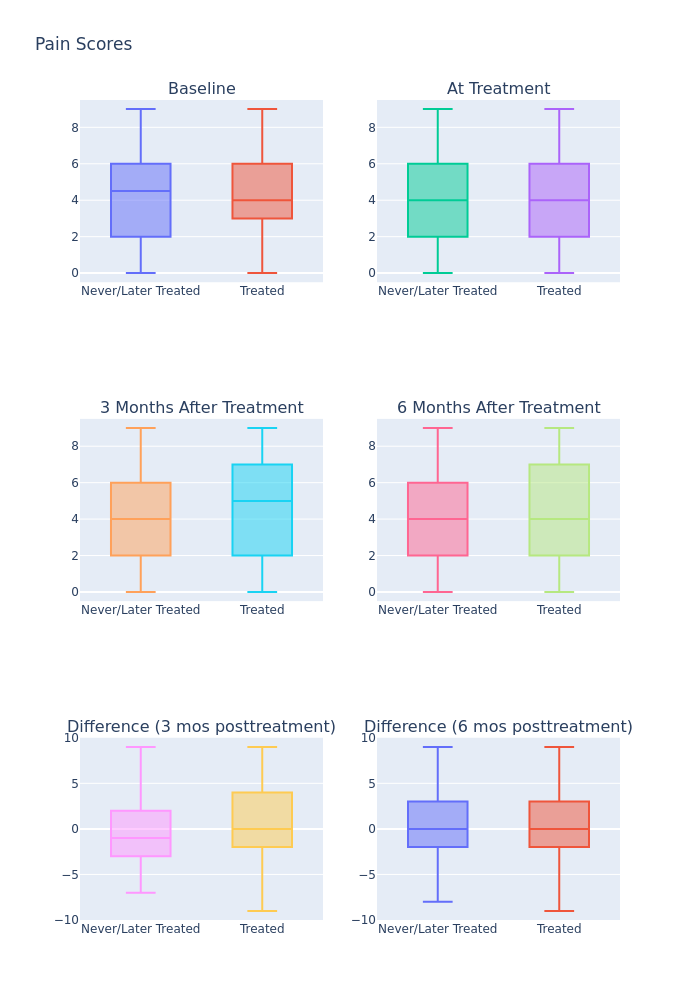

In [26]:
from IPython.display import Image

Image("./assets/pain.png")

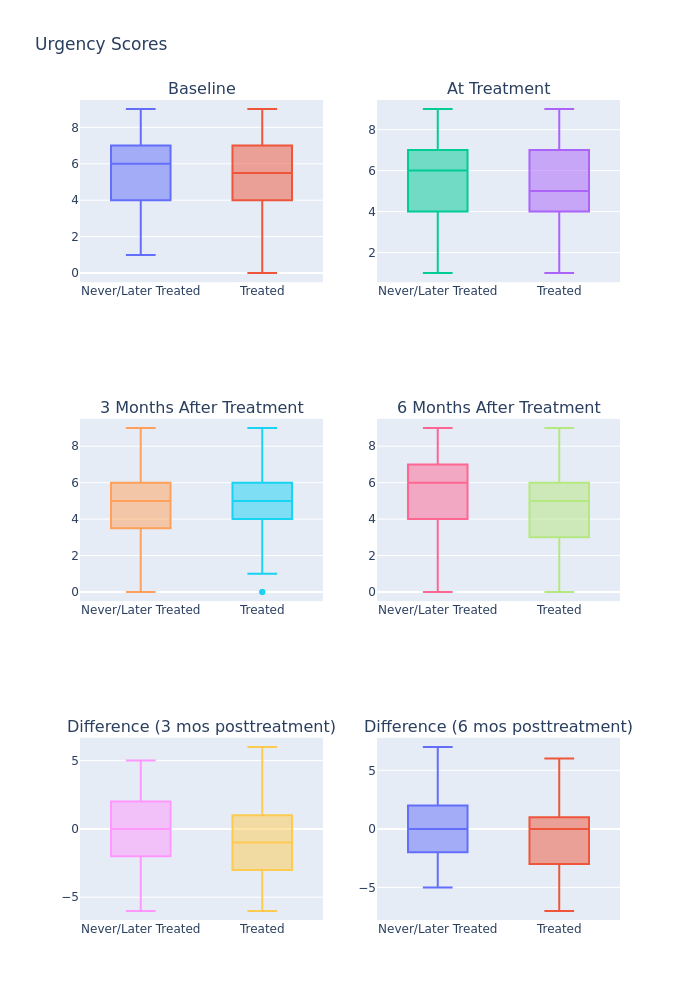

In [27]:
from IPython.display import Image

Image("./assets/urgency.png")

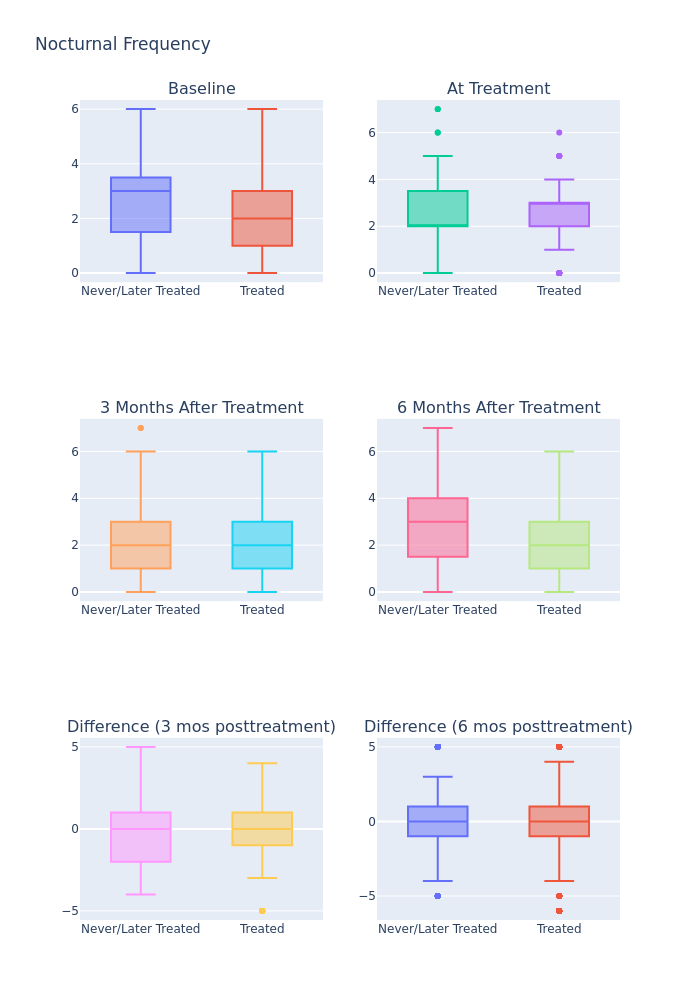

In [28]:
from IPython.display import Image

Image("./assets/nocturnal frequency.png")

## References

Li, Y. P., Propert, K. J., & Rosenbaum, P. R. (2001). Balanced risk set matching. Journal of the American Statistical Association, 96(455), 870–882. https://doi.org/10.1198/016214501753208573